In [1]:
# Step 1: Data collection and cleaning
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('Wholesale_customers_data.csv')

In [3]:
# Check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
# Step 2: Exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Descriptive statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot: xlabel='Fresh', ylabel='Count'>

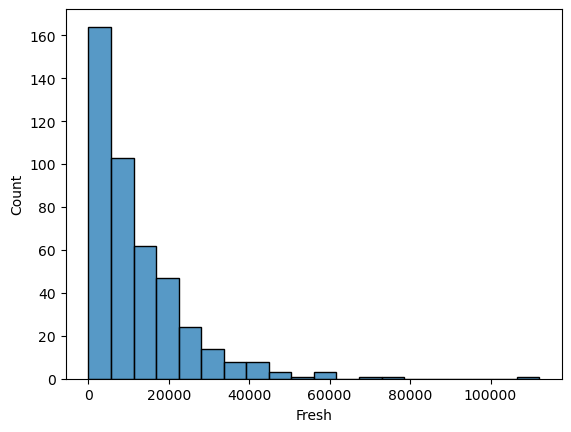

In [6]:
# Distribution of each numerical variable
sns.histplot(data=df, x='Fresh', bins=20)

<AxesSubplot: >

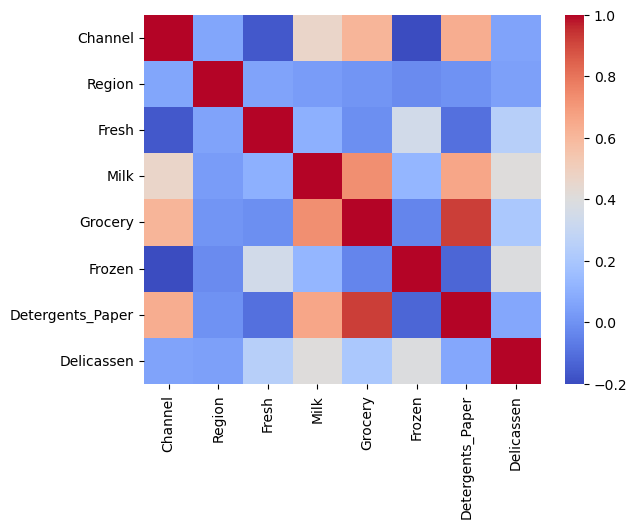

In [7]:
# Correlation matrix of the numerical variables
sns.heatmap(df.corr(), cmap='coolwarm')

In [8]:
# Step 3: Preprocessing the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
# Separate the numerical and categorical variables
num_vars = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
cat_vars = ['Channel', 'Region']

In [10]:
# Normalize the numerical variables
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

In [11]:
# Encode the categorical variables
df = pd.get_dummies(df, columns=cat_vars)

In [12]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)

In [13]:
# Step 4: Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

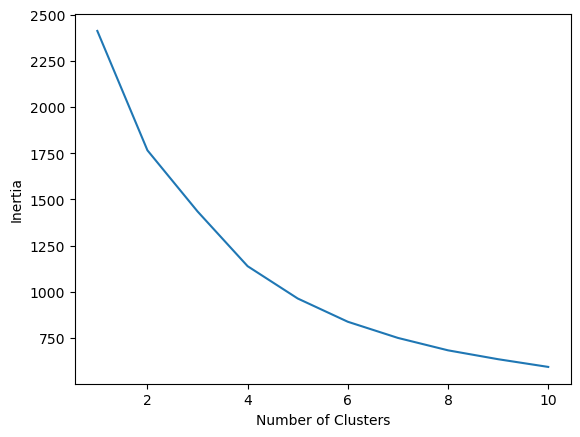

In [14]:
# Determine the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Apply the KMeans algorithm with the optimal number of clusters to the training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [16]:
# Predict the cluster labels for the testing data
y_pred = kmeans.predict(X_test)

In [17]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int32)

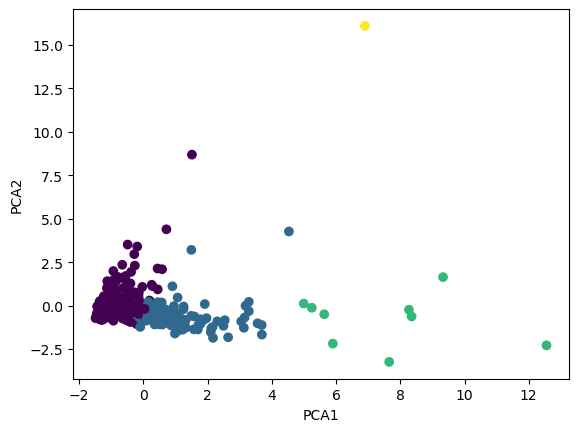

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()